Imagine we want to build a simple classifier for the following datset, *XNOR*, that follows the truth table:

<center>
<table>
    <thead><tr><td>x1</td><td>x2</td><td>XNOR</td></tr></thead>
    <tr><td>0</td><td>0</td><td style="color:green; font-weight:bold">1</td></tr>
    <tr><td>0</td><td>1</td><td style="color:red; font-weight:bold">0</td></tr>
    <tr><td>1</td><td>0</td><td style="color:red; font-weight:bold">0</td></tr>
    <tr><td>1</td><td>1</td><td style="color:green; font-weight:bold">1</td></tr>
</table>
</center>

When we plot this out visually, it's clear that there's no good way to do this in any sort of *linear* fashion. Where would you draw a straight line to get good separability?

Populating the interactive namespace from numpy and matplotlib


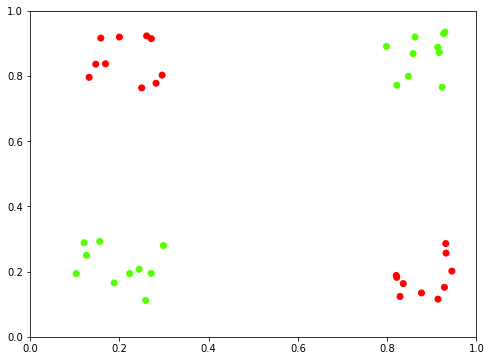

In [1]:
%pylab inline
from IPython.display import Image
from helpers.xnor import make_xnor_dataset, plot_xnor_dataset

X, y = make_xnor_dataset(10)
plot_xnor_dataset(X, y);

## Deconstructing

More specifically, if we want to represent the entirety of the truth table, we can do so with

$ \big( X1 \wedge X2 \big) \lor \big((\neg X1) \wedge (\neg X2) \big)$ 

Which can, in turn, be broken down into sub-expressions. But first, recall our *sigmoid function* from logistic regression, used to convert a prediction coefficient between `0` and `1` to a binary prediction.

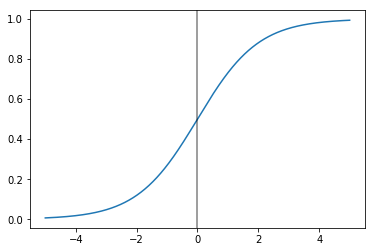

In [2]:
x_ = np.linspace(-5, 5, 1000)
y_ = 1 / (1 + np.exp(-x_))

plt.plot(x_, y_)
plt.gca().axvline(0, c='k', alpha=.5)

With an acceptance value of `0.5`, our `True` values will be the ones that get piped through the sigmoid function and come out the other side with a value greater than `0.5`. Simplifying, this means that if we want to output a `True` value, we just have to make sure that the linear combination that goes into the sigmoid **is greater than zero**

So breaking down the *XNOR* representation above, we used the following 3 symbols:

- And
- Or
- Not

### AND

Consider a simple dummy-Network where we're trying to determine the weights, per sample, for nodes `X1` and `X2`, which will stand in for the `X` and `Y` coordinates above. Also recall that we use the bias unit, `X0` regardless of the value of our traning example.

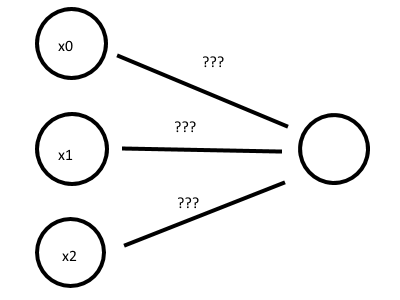

In [3]:
Image('images/weights.png')

We want to figure out weights for each of these nodes such that all `True/False` combinations that come in for `X0` and `X1` ensure a correct truth table. Thus, we arrive at

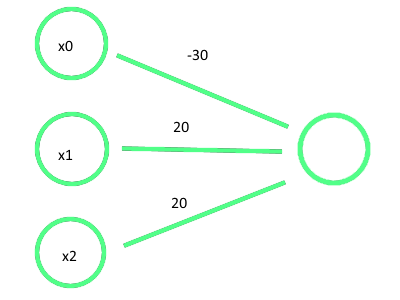

In [4]:
Image('images/and.PNG')

Yielding the following truth table

<center><table>
    <thead><tr><td>x1</td><td>x2</td><td>z</td><td>AND</td></tr></thead>
    <tr><td>0</td><td>0</td><td>-30</td><td style="color:red; font-weight:bold">1</td></tr>
    <tr><td>0</td><td>1</td><td>-10</td><td style="color:red; font-weight:bold">0</td></tr>
    <tr><td>1</td><td>0</td><td>-10</td><td style="color:red; font-weight:bold">0</td></tr>
    <tr><td>1</td><td>1</td><td>10</td><td style="color:green; font-weight:bold">1</td></tr>
</table></center>

### OR

We can follow a similar exercise for OR to get

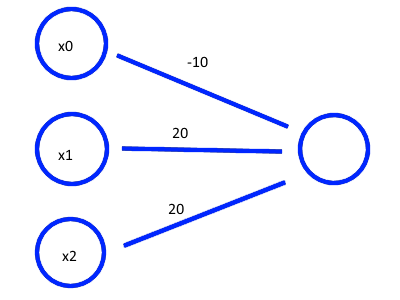

In [5]:
Image('images/or.PNG')

<center><table>
    <thead><tr><td>x1</td><td>x2</td><td>z</td><td>OR</td></tr></thead>
    <tr><td>0</td><td>0</td><td>-10</td><td style="color:red; font-weight:bold">1</td></tr>
    <tr><td>0</td><td>1</td><td>10</td><td style="color:green; font-weight:bold">0</td></tr>
    <tr><td>1</td><td>0</td><td>10</td><td style="color:green; font-weight:bold">0</td></tr>
    <tr><td>1</td><td>1</td><td>30</td><td style="color:green; font-weight:bold">1</td></tr>
</table></center>

### NOT

And a much-simpler NOT gives

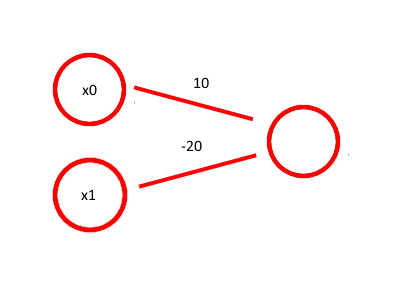

In [6]:
Image('images/not.png')

<center><table>
    <thead><tr><td>x1</td><td>z</td><td>NOT</td></tr></thead>
    <tr><td>0</td><td>10</td><td style="color:green; font-weight:bold">1</td></tr>
    <tr><td>1</td><td>-10</td><td style="color:red; font-weight:bold">0</td></tr>
</table></center>

### Combining

Using the same intuition as above, we can detangle this messy logical statement into a network that looks like the following

$ \big( X1 \wedge X2 \big) \lor \big((\neg X1) \wedge (\neg X2) \big)$ 

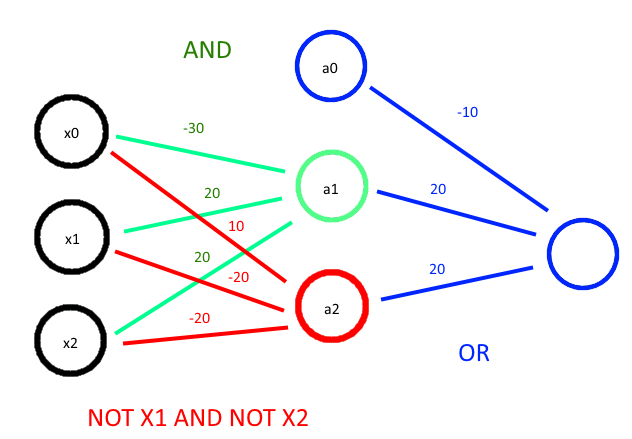

In [7]:
Image('images/xnor.png')

And verify this checks out via the Truth Table (and a lot of tedious HTML)

<center><table>
    <thead><tr><td>x1</td><td>x2</td><td>z1</td><td style="font-weight:bold">a1</td><td>z2</td><td style="font-weight:bold">a2</td><td>OR</td></tr></thead>
    <tr><td>0</td><td>0</td><td>-30</td><td style="color:red; font-weight:bold">0</td>
        <td>10</td><td style="color:green; font-weight:bold">1</td>
        <td style="color:green; font-weight:bold">1</td></tr>
    <tr><td>0</td><td>1</td><td>-10</td><td style="color:red; font-weight:bold">0</td>
        <td>-10</td><td style="color:red; font-weight:bold">0</td>
        <td style="color:red; font-weight:bold">0</td></tr>
    <tr><td>1</td><td>0</td><td>-10</td><td style="color:red; font-weight:bold">0</td>
        <td>-10</td><td style="color:red; font-weight:bold">0</td>
        <td style="color:red; font-weight:bold">0</td></tr>
    <tr><td>1</td><td>1</td><td>30</td><td style="color:green; font-weight:bold">1</td>
        <td>-30</td><td style="color:red; font-weight:bold">0</td>
        <td style="color:green; font-weight:bold">1</td></tr>
</table></center>

## Implementing

Generating more training data, split equally on `True` and `False`

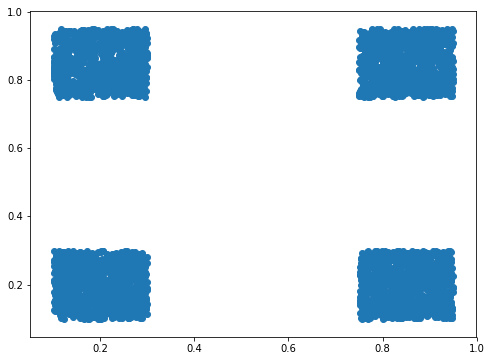

In [15]:
X, y = make_xnor_dataset(1000)

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1]);

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(units=2, activation='tanh', input_dim=2))
model.add(Dense(units=1, activation='sigmoid'))

In [27]:
model.compile(loss='binary_crossentropy',
              optimizer='adam')

In [28]:
model.fit(X, y, epochs=200, verbose=0);

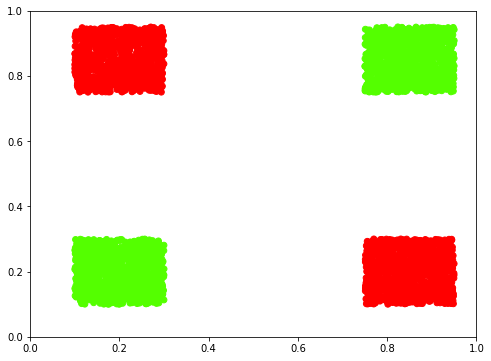

In [29]:
predictions = (model.predict(X) >= .5).reshape(-1).astype(int)
plot_xnor_dataset(X, predictions);

And how!

## Efficiency

We managed to represent this behavior in 1 hidden layer. But consider what would have happened if we wanted to do a similar problem-- computing *Exclusive OR for **10 inputs***. As Andrew Ng points out in Week 4 of his Deep Learning course, representing this as a deep neural network will be orders of magnitude more efficient than as a tall hidden layer.

This relies on the same principle of exponential growth-- splitting things by a factor of 2, vs enumerating all of the 2-to-the-n different nodes.

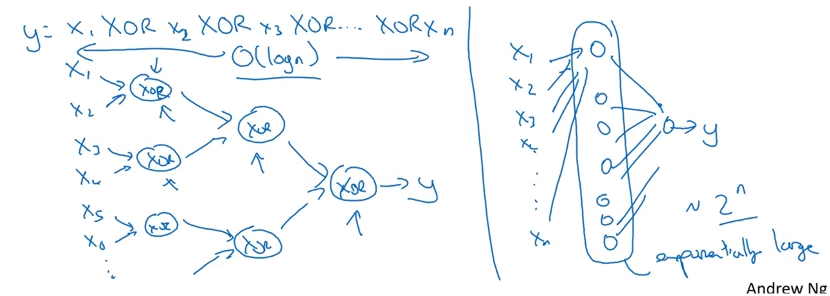

In [14]:
Image('images/xor_exp.png')